In [73]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

In [31]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [32]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [33]:
data.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'],axis=1,inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   degree_p        215 non-null    float64
 5   workex          215 non-null    object 
 6   etest_p         215 non-null    float64
 7   specialisation  215 non-null    object 
 8   mba_p           215 non-null    float64
 9   status          215 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 16.9+ KB


In [35]:
data.shape

(215, 10)

In [36]:
data['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [37]:
#ENCODING

In [38]:
data['gender'] = data.gender.map({'M':0,'F':1})
data['workex'] = data.workex.map({'No':0,'Yes':1})
data['status'] = data.status.map({'Not Placed':0,'Placed':1})
data['specialisation'] = data.specialisation.map({'Mkt&HR':0,'Mkt&Fin':1})


In [39]:
data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


In [40]:
#BALANCED DATASET

In [41]:
data['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [42]:
#its is Placed biased dataset

In [43]:
from sklearn.utils import resample
data_majority = data[data['status']==1]
data_minority = data[data['status']==0]

data_minority_upsample = resample(data_minority , replace = True , n_samples = len(data_majority),random_state =42)
balanced_data = pd.concat([data_majority , data_minority_upsample])

In [44]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

In [45]:
#Seprating Featurs and Target

In [46]:
x = balanced_data.copy().drop('status',axis=1)
y = balanced_data['status']

In [47]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)




In [49]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


In [ ]:
X_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [50]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
knn_predict=knn.predict(x_test)

In [55]:
accuracy_score = accuracy_score(knn_predict,y_test)

In [56]:
accuracy_score

0.7640449438202247

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [76]:
conf_mat = confusion_matrix(y_test, knn_predict)
group_names =['True_Neg' ,'False_Pos', 'False Neg', 'True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1 ,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

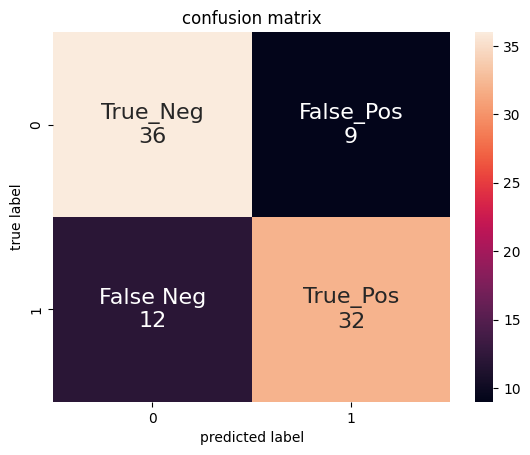

In [78]:
sns.heatmap(conf_mat, annot=labels ,annot_kws= {"size":16}, fmt='')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [82]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train ,y_train)
decision_tree_y_pred = decision_tree.predict(x_test)
decision_tree_accuracy = decision_tree.score(x_test,y_test)
decision_tree_accuracy


0.8539325842696629

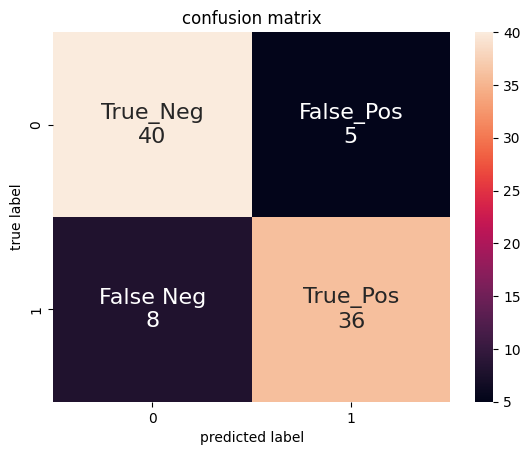

In [83]:
#creating confusion matrix heatmap
conf_mat = confusion_matrix(y_test, decision_tree_y_pred)
group_names =['True_Neg' ,'False_Pos', 'False Neg', 'True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1 ,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels ,annot_kws= {"size":16}, fmt='')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [85]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(x_train, y_train)
random_forest_y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
random_forest_accuracy = random_forest.score(x_test, y_test)
random_forest_accuracy

0.8764044943820225

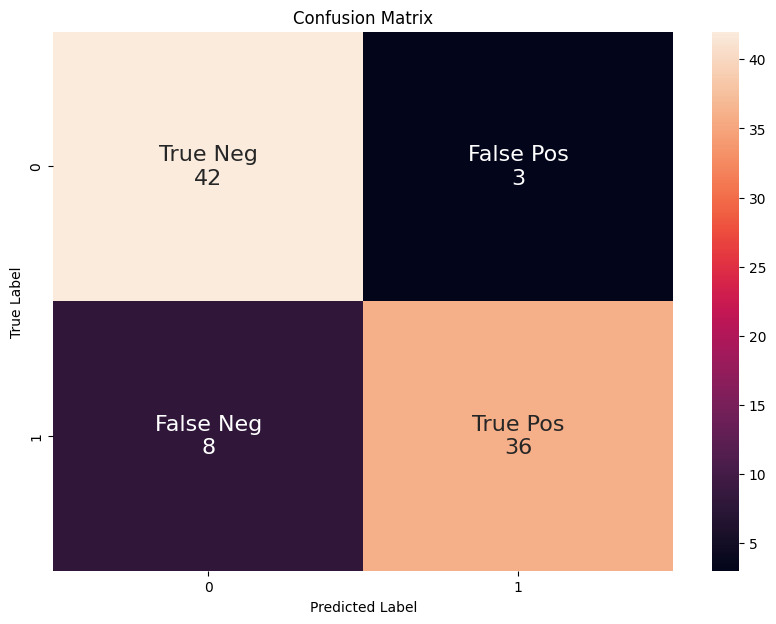

In [87]:
# creating confusion matrix heatmap

conf_mat = confusion_matrix(y_test, random_forest_y_pred)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [89]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    data = {
    'sl_no': [sl_no],
    'gender': [gender],
    'ssc_p': [ssc_p],
    'hsc_p': [hsc_p],
    'degree_p': [degree_p],
    'workex': [workex],
    'etest_p': [etest_p],
    'specialisation': [specialisation],
    'mba_p': [mba_p]
    }
    data = pd.DataFrame(data)
    data['gender'] = data['gender'].map({'M':1,"F":0})
    data['workex'] = data['workex'].map({"Yes":1,"No":0})
    data['specialisation'] = data['specialisation'].map({"Mkt&HR":1,"Mkt&Fin":0})
    scaled_df = scaler.fit_transform(data)
    result = random_forest.predict(scaled_df).reshape(1, -1)
    return result[0]

In [90]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('place')

else:
    print('not place')

not place


In [91]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))